# Fandango Bias Project

The goal of this project is to examine Fandango recent movie rating and determine whether a fix to their "round-up" bug has been implemented. If not, it's reasonable to assume the original bug was intentional.

In [1]:
import pandas as pd
import csv

fandango = pd.read_csv('fandango_score_comparison.csv')

print(fandango.shape)
print(fandango.columns)

(146, 22)
Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


In [2]:
print(fandango.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

In [3]:
movie_1617 = pd.read_csv("movie_ratings_16_17.csv")

print(movie_1617.shape)
print(movie_1617.columns)

(214, 15)
Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [4]:
print(movie_1617.head(5))

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

In [5]:
fan_col = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango = fandango[fan_col]
print(fandango.head(5))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


In [6]:
movie_col = ['movie', 'year', 'fandango']
movie_1617 = movie_1617[movie_col]

print(movie_1617.head(5))

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


# Are the samples random?

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those with under 30 fan reviews or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It's much more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

# Changing the Goal of our Analysis
Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

In [7]:
previous = fandango
after = movie_1617

sample_after = after.sample(10, random_state=5) 
print(sample_after['movie'])

21            Before the Flood
54       Fifty Shades of Black
84                Jason Bourne
102      Manchester by the Sea
26                Blood Father
202           Under the Shadow
208                   Why Him?
28                  Busanhaeng
6       A Street Cat Named Bob
161    The Autopsy of Jane Doe
Name: movie, dtype: object


In [8]:
sample_after['reviews'] = [7, 1500, 16294, 3480, 45, 8, 2727, 274, 40, 40]

print(sample_after)

                       movie  year  fandango  reviews
21          Before the Flood  2016       3.5        7
54     Fifty Shades of Black  2016       2.5     1500
84              Jason Bourne  2016       4.0    16294
102    Manchester by the Sea  2016       3.5     3480
26              Blood Father  2016       4.0       45
202         Under the Shadow  2016       4.0        8
208                 Why Him?  2016       4.0     2727
28                Busanhaeng  2016       4.5      274
6     A Street Cat Named Bob  2016       4.5       40
161  The Autopsy of Jane Doe  2016       4.5       40


80% of the sample has more than 30 reviews, which is "kind of" justify the sample representavitity. 

In [9]:
previous['year'] = previous['FILM'].str[-5:-1]

previous_2015 = previous[previous['year'] == '2015']

after_2016 = after[after['year'] == 2016]

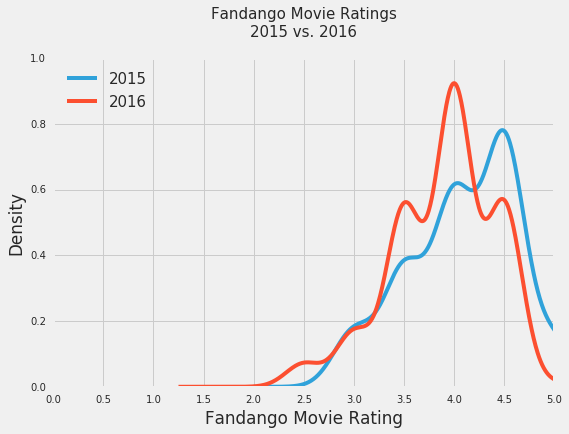

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

previous_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,5.5))
after_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title('Fandango Movie Ratings\n2015 vs. 2016\n',fontsize=15)
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('Fandango Movie Rating')
plt.ylabel('Density')

plt.show()

# Compare plots

Two aspects are striking on the figure above:

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This confirms that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016

In [11]:
previous_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
after_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies were given a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

In [13]:
previous_mean = previous_2015['Fandango_Stars'].mean()
after_mean = after_2016['fandango'].mean()

previous_median = previous_2015['Fandango_Stars'].median()
after_median = after_2016['fandango'].median()

previous_mode = previous_2015['Fandango_Stars'].mode()[0]
after_mode = after_2016['fandango'].mode()[0]

summary = pd.DataFrame()

summary['2015'] = [previous_mean, previous_median, previous_mode]
summary['2016'] = [after_mean, after_median, after_mode]
summary.index = ['mean', 'median', 'mode']

print(summary)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


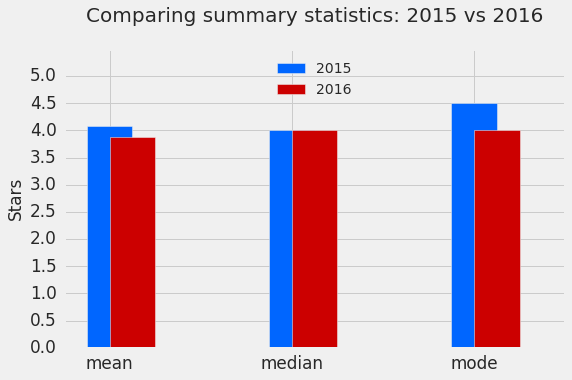

In [153]:
import numpy as np

plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.legend(loc='upper center', fontsize='medium')
plt.title('Comparing summary statistics: 2015 vs 2016\n', fontsize = 20, y = 1)
plt.ylabel('Stars')
plt.tick_params(labelsize='large')

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.